In [1]:
import sys
sys.path.insert(0, '../')
from lib import *

%matplotlib inline

DEBUG = False;

def gauss(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))


In [2]:
SAMPLING=4e-9
BITS= 16384
DYNAMIC_RANGE= 2
AMP= np.array([250,250,250,250,1030])
e_charge=1.60217663 * 1e-19

#                           ADCs to V     ticks to sec          C to e-      still need to correct by Gain of specific run
ADCxTicks2e=       DYNAMIC_RANGE/BITS     * SAMPLING  / AMP  /e_charge


In [3]:
ADCxTicks2e

array([12190.44744149, 12190.44744149, 12190.44744149, 12190.44744149,
        2958.84646638])

## Multiple runs, VUV

In [5]:
# path="/media/rodrigoa/DiscoDuro/SBND_XA_PDE/APSAIA_VIS/joython/"
# Run_props=open_run_properties(0,"../macros/APSAIA_VIS.xlsx")
# Runs=open_runs_table("../macros/APSAIA_VIS.xlsx")
# GAIN=np.array([6.48E+06,	6.72E+06,	6.68E+06,	6.67E+06,	3.00E+06]) #from calibrations, AT 4/2.5v

WEEK="APSAIA_VUV";
path="/scr/neutrinos/rodrigoa/"+WEEK+"/joython/"
Runs=open_runs_table("../macros/"+WEEK+".xlsx")

if WEEK=="APSAIA_VUV":   GAIN=np.array([6.36E+06,	6.61E+06,	6.66E+06,	6.63E+06,	3.00E+06]) #from calibrations, AT 4/2.5v
if WEEK=="DAPHNE_VUV":   GAIN=np.array([6.83E+06,	7.18E+06	, 7.00E+06,	7.08E+06,	3.00E+06]) #from calibrations, AT 4/2.5v
if WEEK=="APSAIA_VUV_2": GAIN=np.array([6.75E+06,	6.98E+06	, 6.90E+06,	6.97E+06,	3.00E+06]) #from calibrations, AT 4/2.5v
ADCxTicks2PE=ADCxTicks2e/GAIN

ADCxTicks2PE=ADCxTicks2e/GAIN

Runs=Runs[Runs["Type"]=="Visible"]

amp  =np.zeros((len(Runs["Channels"].iloc[0]),Runs["Run"].array.shape[0]))
mean =np.zeros((len(Runs["Channels"].iloc[0]),Runs["Run"].array.shape[0]))
err  =np.zeros((len(Runs["Channels"].iloc[0]),Runs["Run"].array.shape[0]))
rate =np.zeros((len(Runs["Channels"].iloc[0]),Runs["Run"].array.shape[0]))

i=0

for ch in Runs["Channels"].iloc[0][:-1]:
# for ch in [0]:
    r=0;
    for run in Runs["Run"].array:
    # for run in [0]:
        
        Run_props=Runs[Runs["Run"]==run].iloc[0]
        run_path=path+"run"+str(run).zfill(2)+"/";
        compress=False
        Pedestal_vars=open_run_var(run_path,"Pedestal_vars",[ch],compressed=compress)
        Charge_vars  =open_run_var(run_path ,"Charge_vars" ,[ch],compressed=compress)
        Peak_vars    =open_run_var(run_path ,"Peak_vars"   ,[ch],compressed=compress)
        TS=open_run_var(run_path,"Timestamp",[ch],compressed=compress)

        Ped_CUT=Pedestal_vars[ch]["STD"]<10
        counts,bins=np.histogram(Charge_vars[ch]["PeakFinderInRange"][Ped_CUT*Peak_vars[ch]["Peak"]>50],100,[0,3e4]);

        std =np.std(Charge_vars[ch]["PeakFinderInRange"][Ped_CUT*Peak_vars[ch]["Peak"]>50])
        mean=np.mean(Charge_vars[ch]["PeakFinderInRange"][Ped_CUT*Peak_vars[ch]["Peak"]>50])

        # popt, pcov = curve_fit(gauss, bins[1:], counts,p0=[max(counts),bins[np.argmax(counts)],std])
        
        
        # ym = gauss(bins[1:], popt[0], popt[1], popt[2])
        # # plt.plot  (bins[1:], ym, c='r', label='Best fit')
        amp [i,r]=popt[0]
        mean[i,r]=popt[1]*ADCxTicks2PE[i]
        err [i,r]=popt[2]*ADCxTicks2PE[i]
        
        duration=(TS[ch][-1]-TS[ch][0])
        rate[i,r]=np.sqrt(np.pi*2*popt[2]**2)*popt[0]*100/3e4/duration #gauss integral divided by bin tickness
        r+=1;
    i+=1;

x=Runs["Run"].array
ys=mean[:4]
yer=err[:4]
legend=Run_props["ChannelName"][:4]

fig,axs=horizontal_subplots(x,ys,yer,legend)
plt.suptitle("Charge over Runs", fontsize=14)
axs[0].set_ylabel("Charge,[PEs]")
for ax in axs: ax.set_ylim([0,30])

plt.figure()
ys=rate[:4]
yer=np.zeros(ys.shape)
fig,axs=horizontal_subplots(x,rate[:4],yer,legend)
plt.suptitle("Rate over Runs", fontsize=14)
for ax in axs: ax.set_ylim([25,35])



/usr/local/lib64/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning:

Covariance of the parameters could not be estimated

/usr/local/lib64/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning:

Covariance of the parameters could not be estimated

/usr/local/lib64/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning:

Covariance of the parameters could not be estimated

/usr/local/lib64/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning:

Covariance of the parameters could not be estimated

/usr/local/lib64/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning:

Covariance of the parameters could not be estimated

/usr/local/lib64/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning:

Covariance of the parameters could not be estimated

/usr/local/lib64/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning:

Covariance of the parameters could not be estimated


/usr/local/lib64/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning:

Covariance of the parameters could not be estimated

/usr/local/lib64/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning:

Covariance of the parameters could not be estimated

/usr/local/lib64/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning:

Covariance of the parameters could not be estimated

/usr/local/lib64/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning:

Covariance of the parameters could not be estimated



RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

# PDE

## VUV

In [39]:
legend

['XARAPUCA', 'SiPM378']

[28.23178998 27.46659605 26.92242556 26.39910975 27.28311622 26.23799977]
[26.34248836 25.36397656 24.47964271 24.17625252 25.00720885 24.29045036]


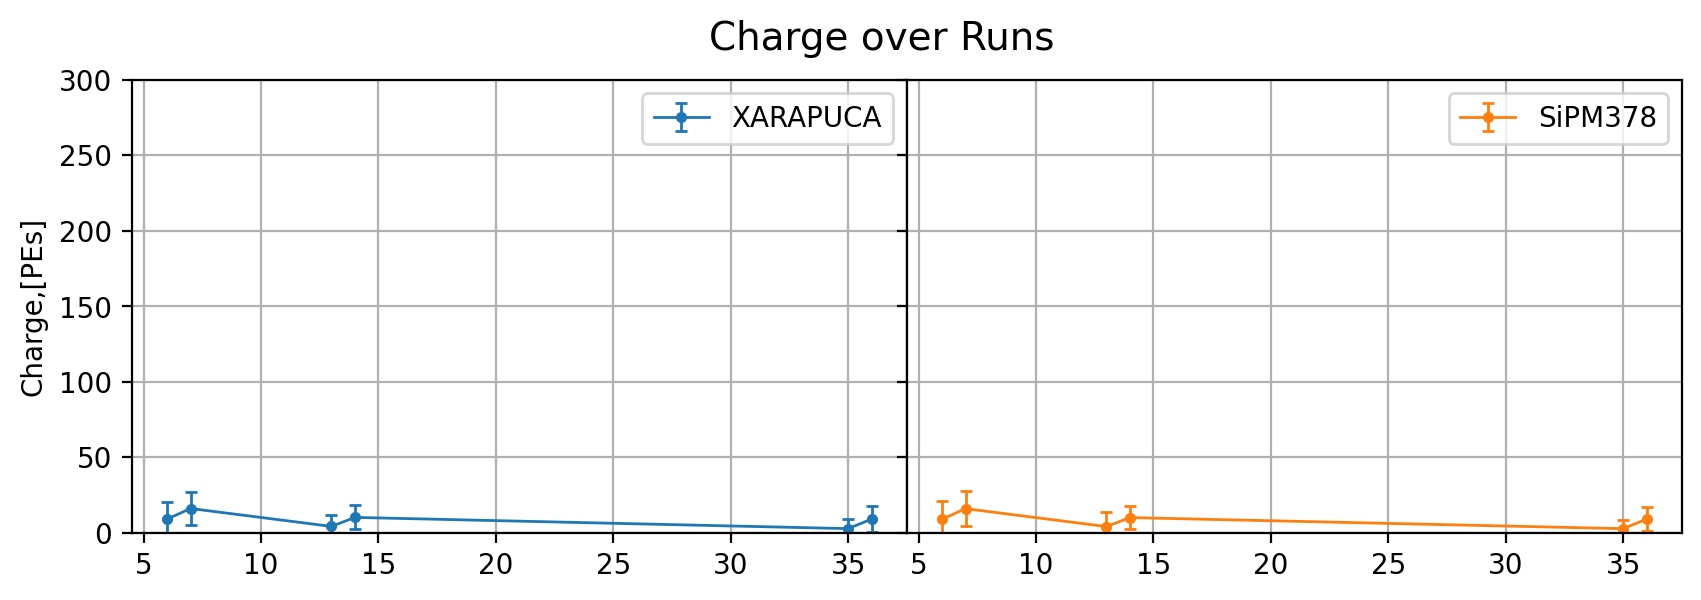

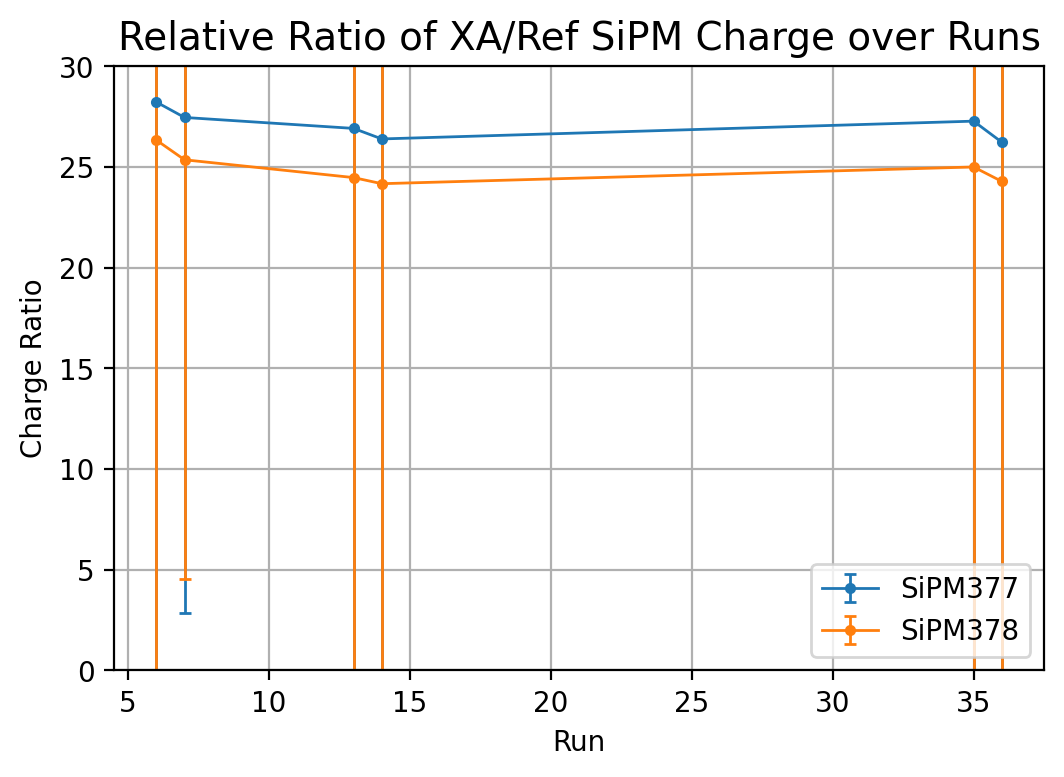

In [43]:
# path="/media/rodrigoa/DiscoDuro/SBND_XA_PDE/APSAIA_VIS/joython/"
# Run_props=open_run_properties(0,"../macros/APSAIA_VIS.xlsx")
# Runs=open_runs_table("../macros/APSAIA_VIS.xlsx")
# GAIN=np.array([6.48E+06,	6.72E+06,	6.68E+06,	6.67E+06,	3.00E+06]) #from calibrations, AT 4/2.5v

WEEK="APSAIA_VIS";
WEEK="APSAIA_VUV";

path="/scr/neutrinos/rodrigoa/"+WEEK+"/joython/"
Runs=open_runs_table("../macros/"+WEEK+".xlsx")

GAIN=np.array([6.36E+06,	6.61E+06,	6.66E+06,	6.63E+06,	1.86E+06]) #from calibrations, AT 4/2.5v
ADCxTicks2PE=ADCxTicks2e/GAIN

Runs=Runs[Runs["Type"]=="Alpha"]
calib_cut=Runs["OverVoltage"].apply(lambda x: x[-1]==2.5).array.to_numpy(); #only 2.5v for now
Runs=Runs[calib_cut];

amp  =np.zeros((len(Runs["Channels"].iloc[0]),Runs["Run"].array.shape[0]))
mean =np.zeros((len(Runs["Channels"].iloc[0]),Runs["Run"].array.shape[0]))
err  =np.zeros((len(Runs["Channels"].iloc[0]),Runs["Run"].array.shape[0]))
rate =np.zeros((len(Runs["Channels"].iloc[0]),Runs["Run"].array.shape[0]))


i=0
for ch in Runs["Channels"].iloc[0][:]:
# for ch in [0]:
    r=0;
    for run in Runs["Run"].array:
    # for run in [0]:
        
        Run_props=Runs[Runs["Run"]==run].iloc[0]
        run_path=path+"run"+str(run).zfill(2)+"/";
        compress=False
        Pedestal_vars=open_run_var(run_path,"Pedestal_vars",[ch],compressed=compress)
        Charge_vars  =open_run_var(run_path ,"Charge_vars" ,[ch],compressed=compress)
        Peak_vars    =open_run_var(run_path ,"Peak_vars"   ,[ch],compressed=compress)
        TS=open_run_var(run_path,"Timestamp",[ch],compressed=compress)

        Ped_CUT=Pedestal_vars[ch]["STD"]<10

        ## Gaussian fit to the charge distribution

        # counts,bins=np.histogram(Charge_vars[ch]["PeakFinderInRange"],100,[0,2e5]);
        # popt, pcov = curve_fit(gauss, bins[1:], counts,p0=[max(counts),bins[np.argmax(counts)],std])
        # ym = gauss(bins[1:], popt[0], popt[1], popt[2])
        
        charge_type="ChargeRangePed"
        charge_type="PeakFinderInRange"
        charge_type="ChargeRangeAverageWvf"
        if DEBUG:
            plt.semilogy()
            plt.hist(Charge_vars[ch][charge_type],100,[0,8e4]);
        Std=np.std  (Charge_vars[ch][charge_type])
        Mean=np.mean(Charge_vars[ch][charge_type])

        mean[i,r]=Mean*ADCxTicks2PE[i]
        if DEBUG:print(ADCxTicks2PE[i])
        err [i,r]=Std *ADCxTicks2PE[i]
        
        r+=1;
    i+=1;

x=Runs["Run"].array
ys=mean                        [[0,1,-1]]
yer=err                        [[0,1,-1]]
# legend=Run_props["ChannelName"][[0,1,-1]]

fig,axs=horizontal_subplots(x,ys,yer,legend)
plt.suptitle("Charge over Runs", fontsize=14)
axs[0].set_ylabel("Charge,[PEs]")
for ax in axs: ax.set_ylim([0,300])


plt.figure(dpi=200)
plt.title("Relative Ratio of XA/Ref SiPM Charge over Runs", fontsize=14)
plt.ylabel("Charge Ratio")
plt.xlabel("Run")
plt.grid()

plt.ylim([0,30])
# if WEEK.__contains__("VIS"):plt.ylim([0,2.5])
# if WEEK.__contains__("VUV"):plt.ylim([0,1.5])

for ch in range(2,4):
    propagated_error=mean[4]/mean[ch]*((err[4]/mean[4])**2+(err[ch]/mean[ch])**2)**0.5;
    plt.errorbar(x,mean[4]/mean[ch],yerr=propagated_error,label=Run_props["ChannelName"][ch],linewidth=1,marker='o',markersize=3,elinewidth=1,capsize=2)
    print(mean[4]/mean[ch])
plt.legend(Run_props["ChannelName"][2:])


## Visible

In [66]:


# for WEEK in ["APSAIA_VUV","APSAIA_VIS"]:
for OV in [2,2.5,3]:
    # WEEK="APSAIA_VUV"    ;
    WEEK="APSAIA_VIS"  ;
    # WEEK="APSAIA_VUV_2";OV=2.5;

# for OV in [7,9,12]:
#   WEEK="DAPHNE_VUV"  ;OV=9;
#   WEEK="DAPHNE_VIS"  ;OV=9;

    path="/scr/neutrinos/rodrigoa/"+WEEK+"/joython/"
    Runs=open_runs_table("../macros/"+WEEK+".xlsx")

    if (WEEK=="APSAIA_VUV") & (OV==2  ):   GAIN=np.array([4.62E+06,	4.84E+06,	4.72E+06,	4.79E+06,	1.48E+06]) #from calibrations, AT 4/2.5v
    if (WEEK=="APSAIA_VUV") & (OV==2.5):   GAIN=np.array([6.34E+06,	6.59E+06,	6.54E+06,	6.61E+06,	1.86E+06]) #from calibrations, AT 4/2.5v
    if (WEEK=="APSAIA_VUV") & (OV==3  ):   GAIN=np.array([8.13E+06,	8.40E+06,	8.46E+06,	8.53E+06,	2.24E+06]) #from calibrations, AT 4/2.5v

    if (WEEK=="APSAIA_VIS") & (OV==2  ):   GAIN=np.array([4.68E+06,	4.89E+06,	4.78E+06,	4.80E+06,	1.49E+06]) #from calibrations, AT 4/2.5v
    if (WEEK=="APSAIA_VIS") & (OV==2.5):   GAIN=np.array([6.47E+06,	6.69E+06,	6.64E+06,	6.63E+06,	1.86E+06]) #from calibrations, AT 4/2.5v
    if (WEEK=="APSAIA_VIS") & (OV==3  ):   GAIN=np.array([8.29E+06,	8.56E+06,	8.63E+06,	8.58E+06,	2.24E+06]) #from calibrations, AT 4/2.5v

    if (WEEK=="APSAIA_VUV_2") & (OV==2  ): GAIN=np.array([4.95E+06,	5.12E+06,	4.99E+06,	5.06E+06,	1.46E+06]) #from calibrations, AT 4/2.5v
    if (WEEK=="APSAIA_VUV_2") & (OV==2.5): GAIN=np.array([6.75E+06,	6.98E+06,	6.90E+06,	6.97E+06,	1.83E+06]) #from calibrations, AT 4/2.5v
    if (WEEK=="APSAIA_VUV_2") & (OV==3  ): GAIN=np.array([8.65E+06,	8.96E+06,	8.96E+06,	9.06E+06,	2.20E+06]) #from calibrations, AT 4/2.5v

    if (WEEK=="DAPHNE_VIS") & (OV== 7):   GAIN=np.array([5.06E+06,	5.30E+06,	5.05E+06,	5.14E+06,	2.52E+06]) #from calibrations, AT 4/9v
    if (WEEK=="DAPHNE_VIS") & (OV== 9):   GAIN=np.array([6.83E+06,	7.18E+06,	7.00E+06,	7.08E+06,	3.30E+06]) #from calibrations, AT 4/9v
    if (WEEK=="DAPHNE_VIS") & (OV==12):   GAIN=np.array([8.87E+06,	9.15E+06,	9.13E+06,	9.20E+06,	4.46E+06]) #from calibrations, AT 4/9v


    if (WEEK=="DAPHNE_VUV") & (OV== 7):   GAIN=np.array([5.06E+06,	5.30E+06,	5.05E+06,	5.14E+06,	2.52E+06]) #from calibrations, AT 4/9v
    if (WEEK=="DAPHNE_VUV") & (OV== 9):   GAIN=np.array([6.83E+06,	7.18E+06,	7.00E+06,	7.08E+06,	3.31E+06]) #from calibrations, AT 4/9v
    if (WEEK=="DAPHNE_VUV") & (OV==12):   GAIN=np.array([8.87E+06,	9.15E+06,	9.13E+06,	9.20E+06,	4.46E+06]) #from calibrations, AT 4/9v


    ADCxTicks2PE=ADCxTicks2e/GAIN

    Runs=Runs[Runs["Type"]=="Visible"]

    if WEEK.__contains__("APSAIA"):calib_cut=Runs["OverVoltage"].apply(lambda x: x[-1]==OV).array.to_numpy(); #only 2.5v for now
    if WEEK.__contains__("DAPHNE"):calib_cut=Runs["OverVoltage"].apply(lambda x: x[-1]==OV).array.to_numpy(); #only 2.5v for now
    Runs=Runs[calib_cut];

    amp  =np.zeros((len(Runs["Channels"].iloc[0]),Runs["Run"].array.shape[0]))
    mean =np.zeros((len(Runs["Channels"].iloc[0]),Runs["Run"].array.shape[0]))
    err  =np.zeros((len(Runs["Channels"].iloc[0]),Runs["Run"].array.shape[0]))
    rate =np.zeros((len(Runs["Channels"].iloc[0]),Runs["Run"].array.shape[0]))


    i=0
    for ch in Runs["Channels"].iloc[0][:]:
    # for ch in [0]:
        r=0;
        for run in Runs["Run"].array:
        # for run in [0]:
            
            Run_props=Runs[Runs["Run"]==run].iloc[0]
            run_path=path+"run"+str(run).zfill(2)+"/";
            compress=False
            Pedestal_vars=open_run_var(run_path,"Pedestal_vars",[ch],compressed=compress)
            Charge_vars  =open_run_var(run_path ,"Charge_vars" ,[ch],compressed=compress)
            Peak_vars    =open_run_var(run_path ,"Peak_vars"   ,[ch],compressed=compress)
            # TS=open_run_var(run_path,"Timestamp",[ch],compressed=compress)

            Ped_CUT=Pedestal_vars[ch]["STD"]<10

            ## Gaussian fit to the charge distribution

            # counts,bins=np.histogram(Charge_vars[ch]["PeakFinderInRange"],100,[0,2e5]);
            # popt, pcov = curve_fit(gauss, bins[1:], counts,p0=[max(counts),bins[np.argmax(counts)],std])
            # ym = gauss(bins[1:], popt[0], popt[1], popt[2])
            
            charge_type="ChargeRangePed"
            charge_type="PeakFinderInRange"
            charge_type="ChargeRangeAverageWvf"
            if DEBUG:
                plt.semilogy()
                plt.hist(Charge_vars[ch][charge_type],100,[0,8e4]);
            Std=np.std  (Charge_vars[ch][charge_type])
            Mean=np.mean(Charge_vars[ch][charge_type])

            mean[i,r]=Mean*ADCxTicks2PE[i]
            if DEBUG:print(ADCxTicks2PE[i])
            err [i,r]=Std *ADCxTicks2PE[i]
            
            r+=1;
        i+=1;

    x=Runs["Run"].array
    ys=mean                        [2:]
    yer=err                        [2:]
    legend=Run_props["ChannelName"][2:]

    for ch in range(2,4):
        # print((mean[4]/mean[ch])[0],(mean[4]/mean[ch])[1])
        print(*(mean[4]/mean[ch]),sep="\t",file=open('output.txt', 'a'))


[1.29161881 1.29353004 1.29054287 1.29482459]
[1.25779887 1.26214178 1.25812065 1.26023088]


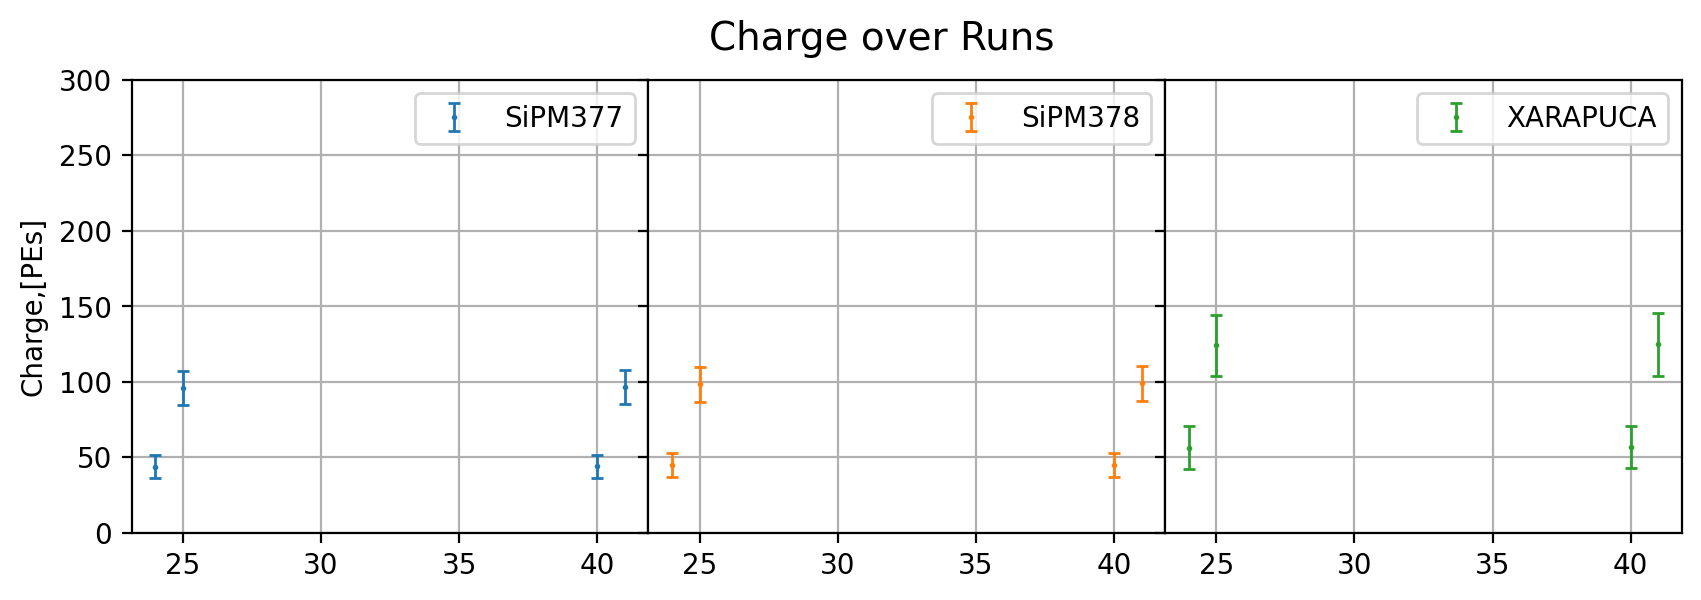

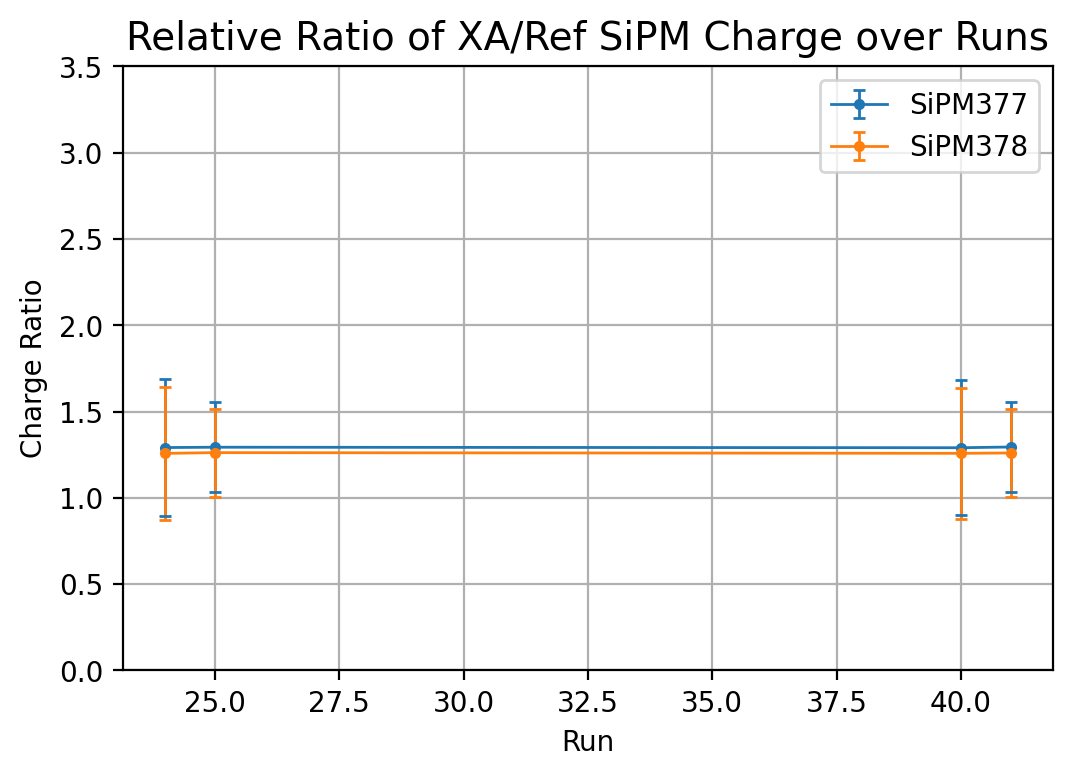

In [68]:
# path="/media/rodrigoa/DiscoDuro/SBND_XA_PDE/APSAIA_VIS/joython/"
# Run_props=open_run_properties(0,"../macros/APSAIA_VIS.xlsx")
# Runs=open_runs_table("../macros/APSAIA_VIS.xlsx")

# WEEK="APSAIA_VUV"    ;OV=3;
# WEEK="APSAIA_VIS"  ;OV=3;
# WEEK="APSAIA_VUV_2";OV=2.5;
WEEK="DAPHNE_VUV"  ;OV=9;
# WEEK="DAPHNE_VIS"  ;OV=9;

path="/scr/neutrinos/rodrigoa/"+WEEK+"/joython/"
Runs=open_runs_table("../macros/"+WEEK+".xlsx")

if (WEEK=="APSAIA_VUV") & (OV==2  ):   GAIN=np.array([4.62E+06,	4.84E+06,	4.72E+06,	4.79E+06,	1.48E+06]) #from calibrations, AT 4/2.5v
if (WEEK=="APSAIA_VUV") & (OV==2.5):   GAIN=np.array([6.34E+06,	6.59E+06,	6.54E+06,	6.61E+06,	1.86E+06]) #from calibrations, AT 4/2.5v
if (WEEK=="APSAIA_VUV") & (OV==3  ):   GAIN=np.array([8.13E+06,	8.40E+06,	8.46E+06,	8.53E+06,	2.24E+06]) #from calibrations, AT 4/2.5v

if (WEEK=="APSAIA_VIS") & (OV==2  ):   GAIN=np.array([4.68E+06,	4.89E+06,	4.78E+06,	4.80E+06,	1.49E+06]) #from calibrations, AT 4/2.5v
if (WEEK=="APSAIA_VIS") & (OV==2.5):   GAIN=np.array([6.47E+06,	6.69E+06,	6.64E+06,	6.63E+06,	1.86E+06]) #from calibrations, AT 4/2.5v
if (WEEK=="APSAIA_VIS") & (OV==3  ):   GAIN=np.array([8.29E+06,	8.56E+06,	8.63E+06,	8.58E+06,	2.24E+06]) #from calibrations, AT 4/2.5v

if (WEEK=="APSAIA_VUV_2") & (OV==2  ): GAIN=np.array([4.95E+06,	5.12E+06,	4.99E+06,	5.06E+06,	1.46E+06]) #from calibrations, AT 4/2.5v
if (WEEK=="APSAIA_VUV_2") & (OV==2.5): GAIN=np.array([6.75E+06,	6.98E+06,	6.90E+06,	6.97E+06,	1.83E+06]) #from calibrations, AT 4/2.5v
if (WEEK=="APSAIA_VUV_2") & (OV==3  ): GAIN=np.array([8.65E+06,	8.96E+06,	8.96E+06,	9.06E+06,	2.20E+06]) #from calibrations, AT 4/2.5v

if (WEEK=="DAPHNE_VIS") & (OV== 7):   GAIN=np.array([5.06E+06,	5.30E+06,	5.05E+06,	5.14E+06,	2.52E+06]) #from calibrations, AT 4/9v
if (WEEK=="DAPHNE_VIS") & (OV== 9):   GAIN=np.array([6.83E+06,	7.18E+06,	7.00E+06,	7.08E+06,	3.30E+06]) #from calibrations, AT 4/9v
if (WEEK=="DAPHNE_VIS") & (OV==12):   GAIN=np.array([8.87E+06,	9.15E+06,	9.13E+06,	9.20E+06,	4.46E+06]) #from calibrations, AT 4/9v


if (WEEK=="DAPHNE_VUV") & (OV== 7):   GAIN=np.array([5.06E+06,	5.30E+06,	5.05E+06,	5.14E+06,	2.52E+06]) #from calibrations, AT 4/9v
if (WEEK=="DAPHNE_VUV") & (OV== 9):   GAIN=np.array([6.83E+06,	7.18E+06,	7.00E+06,	7.08E+06,	3.31E+06]) #from calibrations, AT 4/9v
if (WEEK=="DAPHNE_VUV") & (OV==12):   GAIN=np.array([8.87E+06,	9.15E+06,	9.13E+06,	9.20E+06,	4.46E+06]) #from calibrations, AT 4/9v


ADCxTicks2PE=ADCxTicks2e/GAIN

Runs=Runs[Runs["Type"]=="Visible"]

if WEEK.__contains__("APSAIA"):calib_cut=Runs["OverVoltage"].apply(lambda x: x[-1]==OV).array.to_numpy(); #only 2.5v for now
if WEEK.__contains__("DAPHNE"):calib_cut=Runs["OverVoltage"].apply(lambda x: x[-1]==OV).array.to_numpy(); #only 2.5v for now
Runs=Runs[calib_cut];

amp  =np.zeros((len(Runs["Channels"].iloc[0]),Runs["Run"].array.shape[0]))
mean =np.zeros((len(Runs["Channels"].iloc[0]),Runs["Run"].array.shape[0]))
err  =np.zeros((len(Runs["Channels"].iloc[0]),Runs["Run"].array.shape[0]))
rate =np.zeros((len(Runs["Channels"].iloc[0]),Runs["Run"].array.shape[0]))


i=0
for ch in Runs["Channels"].iloc[0][:]:
# for ch in [0]:
    r=0;
    for run in Runs["Run"].array:
    # for run in [0]:
        
        Run_props=Runs[Runs["Run"]==run].iloc[0]
        run_path=path+"run"+str(run).zfill(2)+"/";
        compress=False
        Pedestal_vars=open_run_var(run_path,"Pedestal_vars",[ch],compressed=compress)
        Charge_vars  =open_run_var(run_path ,"Charge_vars" ,[ch],compressed=compress)
        Peak_vars    =open_run_var(run_path ,"Peak_vars"   ,[ch],compressed=compress)
        # TS=open_run_var(run_path,"Timestamp",[ch],compressed=compress)

        Ped_CUT=Pedestal_vars[ch]["STD"]<10

        ## Gaussian fit to the charge distribution

        # counts,bins=np.histogram(Charge_vars[ch]["PeakFinderInRange"],100,[0,2e5]);
        # popt, pcov = curve_fit(gauss, bins[1:], counts,p0=[max(counts),bins[np.argmax(counts)],std])
        # ym = gauss(bins[1:], popt[0], popt[1], popt[2])
        
        charge_type="ChargeRangePed"
        charge_type="PeakFinderInRange"
        charge_type="ChargeRangeAverageWvf"
        if DEBUG:
            plt.semilogy()
            plt.hist(Charge_vars[ch][charge_type],100,[0,8e4]);
        Std=np.std  (Charge_vars[ch][charge_type])
        Mean=np.mean(Charge_vars[ch][charge_type])

        mean[i,r]=Mean*ADCxTicks2PE[i]
        if DEBUG:print(ADCxTicks2PE[i])
        err [i,r]=Std *ADCxTicks2PE[i]
        
        r+=1;
    i+=1;

x=Runs["Run"].array
ys=mean                        [2:]
yer=err                        [2:]
legend=Run_props["ChannelName"][2:]

fig,axs=horizontal_subplots(x,ys,yer,legend)
plt.suptitle("Charge over Runs", fontsize=14)
axs[0].set_ylabel("Charge,[PEs]")
for ax in axs: ax.set_ylim([0,300])


plt.figure(dpi=200)
plt.title("Relative Ratio of XA/Ref SiPM Charge over Runs", fontsize=14)
plt.ylabel("Charge Ratio")
plt.xlabel("Run")
plt.grid()

plt.ylim([0,3.5])
# if WEEK.__contains__("VIS"):plt.ylim([0,2.5])
# if WEEK.__contains__("VUV"):plt.ylim([0,1.5])

for ch in range(2,4):
    propagated_error=mean[4]/mean[ch]*((err[4]/mean[4])**2+(err[ch]/mean[ch])**2)**0.5;
    plt.errorbar(x,mean[4]/mean[ch],yerr=propagated_error,label=Run_props["ChannelName"][ch],linewidth=1,marker='o',markersize=3,elinewidth=1,capsize=2)
    print(mean[4]/mean[ch])
plt.legend(Run_props["ChannelName"][2:])


# Other stuff

## Single Run

(1, 2000.0)

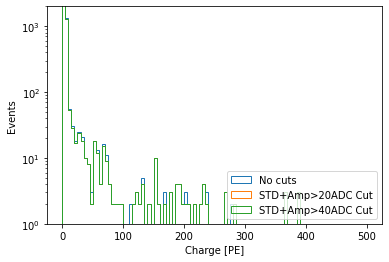

In [41]:
# Let's create a function to model and create data
WEEK="APSAIA_VIS";
path="/scr/neutrinos/rodrigoa/"+WEEK+"/joython/"

for ch in [5]:
    r=0;
    # for run in Runs["Run"].array:
    for run in [0]:
        Run_props=open_run_properties(run,"../macros/APSAIA_VIS.xlsx")
        run_path=path+"run"+str(run).zfill(2)+"/";
        compress=False
        Pedestal_vars=open_run_var(run_path,"Pedestal_vars",[ch],compressed=compress)
        Charge_vars  =open_run_var(run_path ,"Charge_vars" ,[ch],compressed=compress)
        Peak_vars    =open_run_var(run_path ,"Peak_vars"   ,[ch],compressed=compress)


Ped_CUT=Pedestal_vars[ch]["STD"]<10

plt.hist(Charge_vars[ch]["PeakFinderInRange"]                                                 *ADCxTicks2PE[4],100,[0,500],histtype="step");
plt.hist(Charge_vars[ch]["PeakFinderInRange"][Ped_CUT*Peak_vars[ch]["Peak"]>20]               *ADCxTicks2PE[4],100,[0,500],histtype="step");
plt.hist(Charge_vars[ch]["PeakFinderInRange"][Ped_CUT*Peak_vars[ch]["Peak"]>40]               *ADCxTicks2PE[4],100,[0,500],histtype="step");
# counts,bins=np.histogram(Charge_vars[0]["PeakFinderInRange"][Ped_CUT*Peak_vars[ch]["Peak"]>40]*ADCxTicks2PE[4],100,[0,30]);

# std=np.std(Charge_vars[0]["PeakFinderInRange"][Ped_CUT*Peak_vars[ch]["Peak"]>40]*ADCxTicks2PE[4])

# popt, pcov = curve_fit(gauss, bins[1:], counts,p0=[max(counts),bins[np.argmax(counts)],std])


# print(sum(gauss(np.arange(0,1e8),popt[0], popt[1], popt[2])) ) 

# ym = gauss(bins[1:], popt[0], popt[1], popt[2])
# plt.plot  (bins[1:], ym, c='r', label='Best fit')

plt.semilogy()

plt.legend(["No cuts","STD+Amp>20ADC Cut","STD+Amp>40ADC Cut","Best Fit"],loc="lower right")
plt.xlabel("Charge [PE]")
plt.ylabel("Events")
plt.ylim([1,2e3])


## Multiple Runs: amplitude

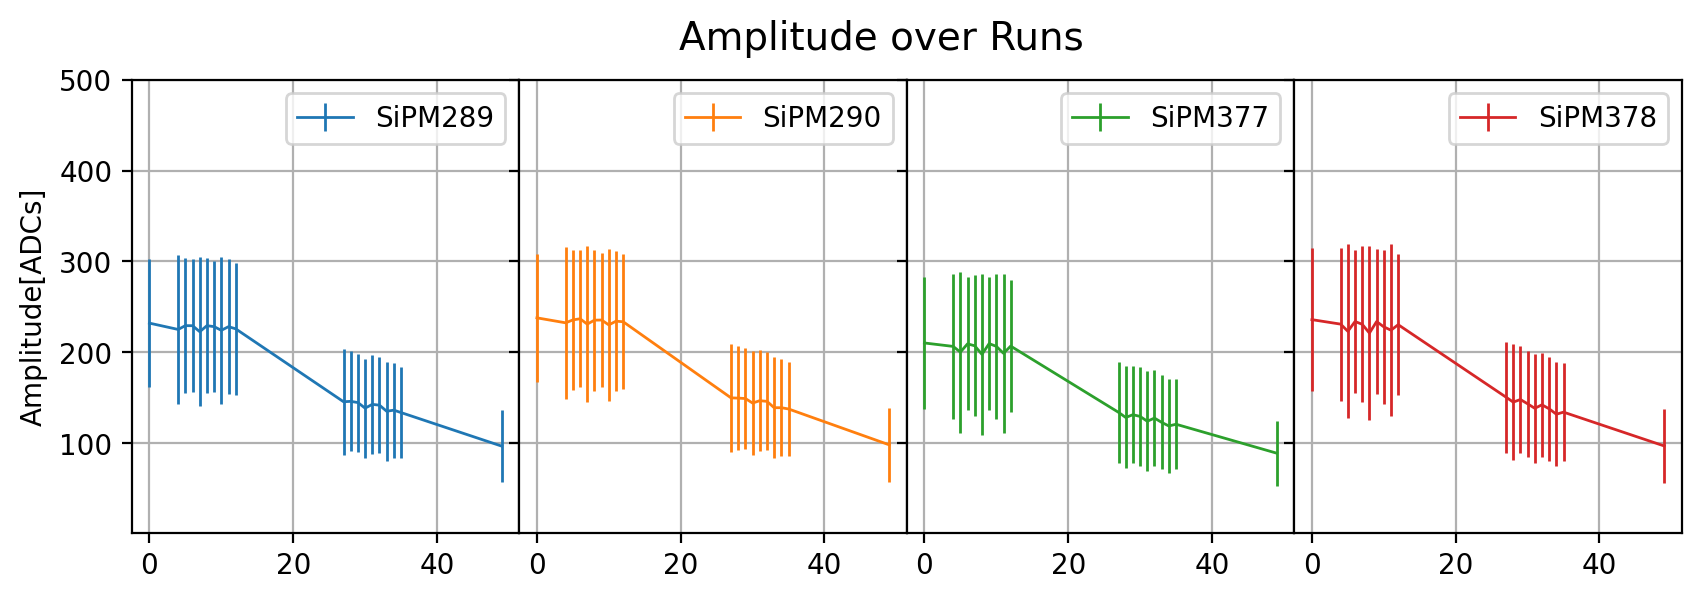

In [22]:
Runs=Runs[Runs["Type"]=="Alpha"]


amp  =np.zeros((len(Run_props["Channels"]),Runs["Run"].array.shape[0]))
mean =np.zeros((len(Run_props["Channels"]),Runs["Run"].array.shape[0]))
err  =np.zeros((len(Run_props["Channels"]),Runs["Run"].array.shape[0]))
rate =np.zeros((len(Run_props["Channels"]),Runs["Run"].array.shape[0]))

i=0

for ch in Run_props["Channels"]:
# for ch in [0]:
    r=0;
    for run in Runs["Run"].array:
    # for run in [0]:
        
        Run_props=open_run_properties(run,"../macros/APSAIA_VUV.xlsx")
        run_path=path+"run"+str(run).zfill(2)+"/";
        compress=False
        Pedestal_vars=open_run_var(run_path,"Pedestal_vars",[ch],compressed=compress)
        Charge_vars  =open_run_var(run_path ,"Charge_vars" ,[ch],compressed=compress)
        Peak_vars    =open_run_var(run_path ,"Peak_vars"   ,[ch],compressed=compress)
        TS=open_run_var(run_path,"Timestamp",[ch],compressed=compress)

        Ped_CUT=Pedestal_vars[ch]["STD"]<10
        counts,bins=np.histogram(Peak_vars[ch]["Peak"][Ped_CUT*Peak_vars[ch]["Peak"]>40],100,[0,1000]);
        
        # plt.hist(Peak_vars[ch]["Peak"][Ped_CUT*Peak_vars[ch]["Peak"]>40],100,[0,1000]);

        std=np.std(Peak_vars[ch]["Peak"][Ped_CUT*Peak_vars[ch]["Peak"]>40])

        try: 
            popt, pcov = curve_fit(gauss, bins[1:], counts,p0=[max(counts),bins[np.argmax(counts)],std])
            amp [i,r]=popt[0]
            mean[i,r]=popt[1]
            err [i,r]=popt[2]
        except:
            amp [i,r]=0
            mean[i,r]=0
            err [i,r]=0

        
        r+=1;
    i+=1;


x=Runs["Run"].array
ys=mean[:4]
yer=err[:4]
legend=Run_props["ChannelName"][:4]

fig,axs=horizontal_subplots(x,ys,yer,legend)
plt.suptitle("Amplitude over Runs", fontsize=14)
axs[0].set_ylabel("Amplitude[ADCs]")
for ax in axs: ax.set_ylim([2,500])

## Single Run, Amplitude

168622.8808309386


(1.0, 1000.0)

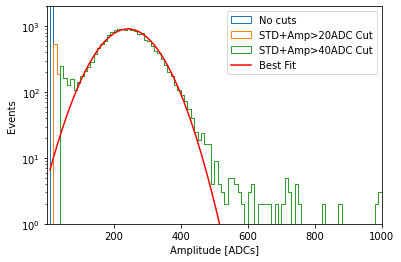

In [38]:
# Let's create a function to model and create data

for ch in [0]:
    r=0;
    # for run in Runs["Run"].array:
    for run in [0]:
        Run_props=open_run_properties(run,"../macros/APSAIA_VUV.xlsx")
        run_path=path+"run"+str(run).zfill(2)+"/";
        compress=False
        Pedestal_vars=open_run_var(run_path,"Pedestal_vars",[ch],compressed=compress)
        Charge_vars  =open_run_var(run_path ,"Charge_vars" ,[ch],compressed=compress)
        Peak_vars    =open_run_var(run_path ,"Peak_vars"   ,[ch],compressed=compress)


Ped_CUT=Pedestal_vars[0]["STD"]<6

plt.hist(Peak_vars[0]["Peak"]                                 ,100,[0,1e3],histtype="step");
plt.hist(Peak_vars[0]["Peak"][Ped_CUT*Peak_vars[0]["Peak"]>20],100,[0,1e3],histtype="step");
plt.hist(Peak_vars[0]["Peak"][Ped_CUT*Peak_vars[0]["Peak"]>40],100,[0,1e3],histtype="step");
counts,bins=np.histogram(Peak_vars[0]["Peak"][Ped_CUT*Peak_vars[0]["Peak"]>40],100,[0,1e3]);

std=np.std(Peak_vars[0]["Peak"][Ped_CUT*Peak_vars[0]["Peak"]>40])

popt, pcov = curve_fit(gauss, bins[1:], counts,p0=[max(counts),bins[np.argmax(counts)],std])


print(sum(gauss(np.arange(0,1e8),popt[0], popt[1], popt[2])) ) 

ym = gauss(bins[1:], popt[0], popt[1], popt[2])
plt.plot  (bins[1:], ym, c='r', label='Best fit')

plt.semilogy()

plt.legend(["No cuts","STD+Amp>20ADC Cut","STD+Amp>40ADC Cut","Best Fit"])
plt.xlabel("Amplitude [ADCs]")
plt.ylabel("Events")
plt.ylim([1,2e3])
plt.xlim([1,1e3])
